# Create a stacked barplot of normalized target contributions for top epilepsy predictions

Also creates a legend which can be used with the cytoscape viz

In [1]:
library(ggplot2)
library(readr)

In [2]:
target_df = readr::read_tsv("./target-contributions-long.tsv")
head(target_df, 2)

Parsed with column specification:
cols(
  compound_name = col_character(),
  disease_pctl = col_double(),
  target = col_character(),
  normalized_contribution = col_double()
)


compound_name,disease_pctl,target,normalized_contribution
Topiramate,1,gamma-aminobutyric acid (GABA) A receptor,0.144430
Topiramate,1,cytochrome P450,0.037887


In [3]:
colormap_df = readr::read_tsv("./target-colormap.tsv")
head(colormap_df, 2)

color_map =  colormap_df$color
names(color_map) = colormap_df$target

label_map =  colormap_df$label
names(label_map) = colormap_df$target

Parsed with column specification:
cols(
  target = col_character(),
  color = col_character(),
  label = col_character()
)


target,color,label
gamma-aminobutyric acid (GABA) A receptor,#bcbd22,GABAᴀ Receptors
cytochrome P450,#ff7f0e,Cytochrome P450s


In [4]:
target_df$target = factor(target_df$target, levels=rev(colormap_df$target))

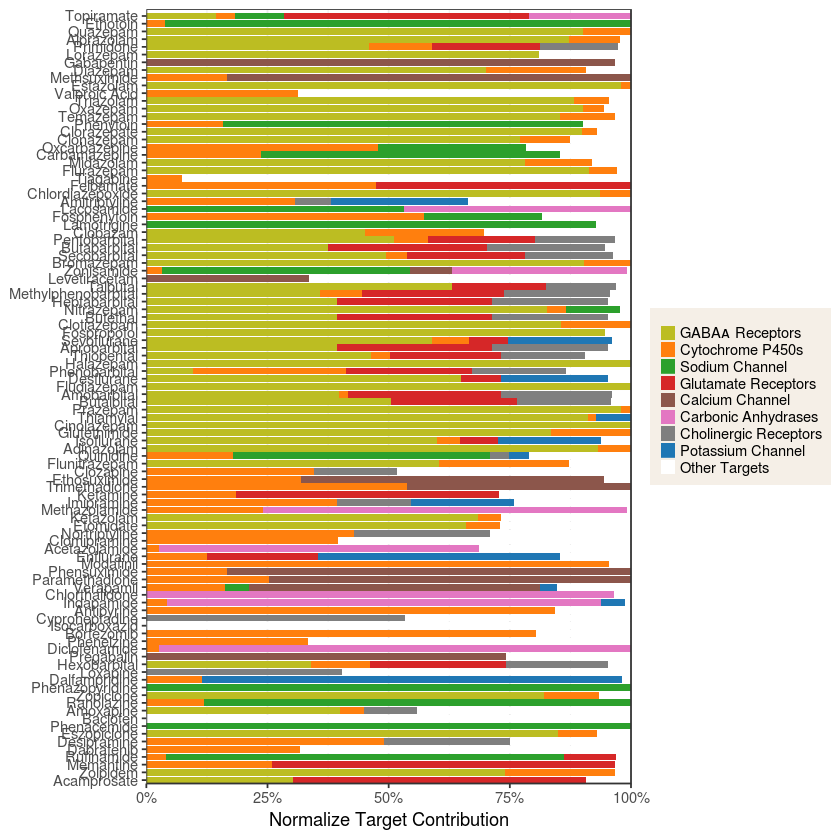

In [5]:
gg = ggplot2::ggplot(target_df, ggplot2::aes(x = compound_name, y = normalized_contribution, fill = target)) +
  ggplot2::geom_bar(stat='identity', width=8) +
  ggplot2::scale_fill_manual(values=color_map, name=NULL, breaks=names(color_map), labels=label_map) +
  ggplot2::scale_x_discrete(limits=rev(target_df$compound_name), expand=c(0, 0), name=NULL) +
  ggplot2::scale_y_continuous(expand=c(0, 0), name='Normalize Target Contribution', labels = scales::percent) +
  ggplot2::theme_bw() +
  ggplot2::coord_flip() +
  ggplot2::theme(
    legend.background = ggplot2::element_rect(fill='#f5efe7', color=NA),
    legend.key.size = grid::unit(0.7, "lines"),
    legend.key = ggplot2::element_rect(fill=NA, color='#f5efe7')
  )

gg

In [6]:
ggplot2::ggsave('barplot-and-legend.svg', gg, height=14)

Saving 6.67 x 14 in image
